In [ ]:
UID:

## Project Title:  Flavorful Insights 
#### A customer sentiment analysis project for bakery items from Amazon Fine Foods Reviews 

**Summary**:  
This project aims to analyze customer sentiment towards bakery products from Amazon Fine Foods reviews and compare the performance of three sentiment analysis models:
- VADER
- roBERTa
- Hugging Face Pipeline (Transformers)

The analysis tries to address the question: 
**“How can sentiment analysis of customer reviews inform market strategies, product development, and pricing decisions for both large e-commerce platforms like Amazon and small businesses in the food industry?”**

### References:
Anvil Works. (n.d.). Using Hugging Face transformers on the Anvil server. Retrieved March 18, 2025, from https://anvil.works/forum/t/using-hugging-face-transformers-on-the-anvil-server/17264

Analytics Vidhya. (2022, October). Sentiment analysis using VADER. Retrieved March 18, 2025, from https://www.analyticsvidhya.com/blog/2022/10/sentiment-analysis-using-vader/

Barbieri, F., Camacho-Collados, J., Espinosa Anke, L., & Neves, L. (2020). TweetEval: Unified benchmark and comparative evaluation for tweet classification. *Findings of the Association for Computational Linguistics: EMNLP 2020*, 1644–1650. https://doi.org/10.18653/v1/2020.findings-emnlp.148

GeeksforGeeks. (n.d.). How to create a pie chart in Seaborn? Retrieved March 18, 2025, from https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/

Hugging Face. (n.d.). CardiffNLP/twitter-roberta-base-sentiment. Retrieved March 18, 2025, from https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

Kaggle. (n.d.). Amazon Fine Food Reviews dataset. Retrieved March 18, 2025, from https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

Matplotlib. (n.d.). Matplotlib.pyplot.suptitle. Retrieved March 18, 2025, from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

Mulla, R. (2021). Sentiment analysis Python YouTube tutorial. Kaggle. Retrieved March 18, 2025, from https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial

PrettyTable. (n.d.). PrettyTable (version 3.15.1) [Python package]. PyPI. Retrieved March 21, 2025, from https://pypi.org/project/prettytable/

Scikit-learn. (n.d.). *TfidfVectorizer*. Retrieved March 18, 2025, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Stanford SNAP. (n.d.). Web-FineFoods dataset. Retrieved March 18, 2025, from https://snap.stanford.edu/data/web-FineFoods.html

Stack Overflow. (2018, March 1). How to use tqdm with pandas in a Jupyter notebook? Retrieved March 18, 2025, from https://stackoverflow.com/questions/40476680/how-to-use-tqdm-with-pandas-in-a-jupyter-notebook

Stack Overflow. (2019, April 15). How to add extra stop words in addition to default stopwords in WordCloud? Retrieved March 18, 2025, from https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud


### Table of Contents:

- [Data](#data)  
   - [Source](#source) 
   - [Dataset Description](#dataset-description)
   - [Dataset Description](#dataset-description)
   - [Features](#features)
- [Data Preprocessing](#data-preprocessing)
- [EDA](#eda)  
   - [Vectorization](#vectorization)  
   - [Statistical Summary](#statistical-summary)  
   - [Pie Chart](#pie-chart)  
   - [Count Plot](#count-plot)  
- [VADER Model](#vader-model)  
   - [Plot of Compound Score for the Vader Model](#plot-of-compound-score-for-the-vader-model)  
   - [Plot of Sentiment Analysis of Ratings for VADER Sentiment Scores](#plot-of-sentiment-analysis-of-ratings-for-vader-sentiment-scores)  
   - [Word Cloud for Vader Model](#word-cloud-for-vader-model)  
- [roBERTa Model](#roberta-model)  
   - [Plot of Compound Score for the roBERTa Model](#plot-of-compound-score-for-the-roberta-model)  
   - [Plot of Sentiment Analysis of Ratings for roBERTa Sentiment Scores](#plot-of-sentiment-analysis-of-ratings-for-roberta-sentiment-scores)  
   - [Word Cloud for roBERTa Model](#word-cloud-for-roberta-model)  
- [Pair Plot for Comparison of VADER and roBERTa Models](#pair-plot-for-comparison-of-vader-and-roberta-models)  
- [Hugging Face Pipeline (Transformers) Model](#hugging-face-pipeline-transformers-model)  
   - [Plot of Sentiment Distribution Across Ratings for the Huggingface Pipeline (Transformers) Model](#plot-of-sentiment-distribution-across-ratings-for-the-huggingface-pipeline-transformers-model)  
   - [Plot of Sentiment Analysis of Ratings for Huggingface Pipeline (Transformers) Sentiment](#plot-of-sentiment-analysis-of-ratings-for-huggingface-pipeline-transformers-sentiment)
   -  [Word Cloud for Hugging Face Pipeline Model](#word-cloud-for-hugging-face-pipeline-model)  
- [Manually Assigning Actual Sentiment Scores](#manually-assigning-actual-sentiment-scores)  
- [Performance Evaluation](#performance-evaluation)  
   - [Calculating Accuracy, Precision, Recall, F1 Score for All Three Models](#calculating-accuracy-precision-recall-f1-score-for-all-three-models)  
   - [Collating the Results](#collating-the-results)  
   - [Confusion Matrix](#confusion-matrix)  
 


In [1]:
#!pip install wordcloud
#!pip install torch torchvision torchaudio
#!pip install prettytable

In [2]:
#import necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('ggplot')
from prettytable import PrettyTable
from transformers import pipeline

In [3]:
# Downloading specific NLTKresources
#nltk.download('punkt')  # For tokenization
#nltk.download('averaged_perceptron_tagger')  # For POS tagging
#nltk.download('maxent_ne_chunker')  # For named entity recognition
#nltk.download('words')  # For the word corpus used in chunking
nltk.download('vader_lexicon') # VADER assigns sentiment scores (positive, negative, neutral,compound) to text - useful for sentiment analysis 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kar_o\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Data
#### Source
- For text file: https://snap.stanford.edu/data/web-FineFoods.html
- For .csv file: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

#### Description:
This dataset comprises approximately 500,000 reviews of fine foods from Amazon from 10/1999 to 10/2012

#### Features:
- **Id** - Unique identifier for each review.
- **ProductId** - Unique identifier for the product being reviewed.
- **UserId** - Unique identifier for the user who wrote the review.
- **ProfileName** - Display name of the user who submitted the review.
- **HelpfulnessNumerator** - How many users found the review helpful.
- **HelpfulnessDenominator** - Total  users who voted on the helpfulness of the review.
- **Score** - Rating given by the user, typically on a scale of 1 to 5.
- **Time** - Timestamp of when the review was submitted.
- **Summary** - Short summary of the review.
- **Text** - Elaborate review provided by the user.

### Data Preprocessing

- Loading the Data and assessing the dataset size
- Renaming Columns for better readability
- Handling Missing Values
- Checking for Duplicates
- Filtering for Bakery-Related Products
- Displaying the final dataframe

In [4]:
# Upload data
df = pd.read_csv("Reviews.csv")
df.shape

(568454, 10)

In [5]:
df.columns #checking col names

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
df = df.rename(columns={"Score":"Rating"}) # this is the primary column for my analysis - renaming for better understanding
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Rating', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Rating                  568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
#Handling missing values
print(df.isna().sum()) #find how many?

na_cols = df.columns[df.isna().any()] #na_cols are ProfileName and Summary

#print(df[na_cols].dtypes) #finding datatype of those cols
#rows_with_na_summary = df[df['ProfileName'].isna()][['ProfileName', 'Summary', "Text"]]
#rows_with_na_summary

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Rating                     0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [9]:
df['ProfileName']=df['ProfileName'].fillna('Unknown') #filling missing values 
df['Summary']= df['Summary'].fillna('No Summary') #filling missing values 
df.isna().any() #check again

Id                        False
ProductId                 False
UserId                    False
ProfileName               False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Rating                    False
Time                      False
Summary                   False
Text                      False
dtype: bool

In [10]:
num_duplicates = df.duplicated().sum() #checking for duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [11]:
# Making a list of bakery-related keywords
list_of_baking_words = ["cake", "bread", "cookie", "muffin", "pastry", "croissant", "bagel", "biscuit", "donut", "brownie"]

# Filtering rows where 'Summary' col contains the above words
bakery_df= df[df["Summary"].str.contains('|'.join(list_of_baking_words), case=False, na=False)]

# Results
print(bakery_df.head())

      Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
116  117  B0026Y3YBK  A3P60QLFDDCHOY   Giordano "GB"                     2   
117  118  B0026Y3YBK  A38BUM0OXH38VK    singlewinder                     0   
183  184  B001KUUNP6  A262Z0S6PT9U16    Lee Thombley                     3   
375  376  B0087HW5E2  A139RTDNMU3WY5    blanket lady                     2   
394  395  B001ELL6O8  A13T2G4T8LR8XA  First Time Mom                     2   

     HelpfulnessDenominator  Rating        Time  \
116                       2       5  1304899200   
117                       0       5  1347667200   
183                       3       5  1292716800   
375                       2       5  1339977600   
394                       2       5  1189296000   

                                            Summary  \
116                                   Great cookies   
117                           Best everyday cookie!   
183  Perfect for gluten-free chocolate chip cookies   
375 

### EDA
- **Vectorization** (this is not a necessary step for this project but can be helpful)
  - Vectorization helps in identifying relevant bakery keywords in the text data, useful for interpreting sentiment scores. By matching these keywords, it can be assessed if the presence of certain terms correlates with positive or negative sentiments, enhancing model interpretability.
- **Statistical summary**
- **Pie Chart**
- **Count Plot**

#### Vectorization

In [12]:
# Vectorizing the Summary column of the bakery-related reviews to find if the keywords exist
vectorizer = TfidfVectorizer(stop_words="english") #initializing a vectorizer object to convert text -> numerical fts
baking_words = vectorizer.fit_transform(bakery_df["Summary"]) #running the vectorizer on summary col
baking_features = vectorizer.get_feature_names_out() # Extracting top features from vectorized df

#Function to find the matching words in the list of baking words and the baking features array
for word in list_of_baking_words :  
    if word in baking_features:
        print(f"{word} is present in Summary")

cake is present in Summary
bread is present in Summary
cookie is present in Summary
muffin is present in Summary
pastry is present in Summary
croissant is present in Summary
bagel is present in Summary
biscuit is present in Summary
donut is present in Summary
brownie is present in Summary


#### Statistical summary

In [13]:
bakery_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Rating,Time
count,11048.000000,11048.000000,11048.000000,11048.000000,1.104800e+04
mean,276918.953295,1.421705,1.747556,4.470221,1.281748e+09
std,165211.115639,3.706097,4.155602,1.062806,5.240040e+07
min,117.000000,0.000000,0.000000,1.000000,9.828000e+08
25%,143946.000000,0.000000,0.000000,4.000000,1.244160e+09
50%,263833.000000,0.000000,0.000000,5.000000,1.294445e+09
75%,420714.750000,2.000000,2.000000,5.000000,1.325635e+09
max,567573.000000,96.000000,96.000000,5.000000,1.351210e+09


#### Pie Chart and Count Plot

C:\Users\kar_o\AppData\Local\Temp\ipykernel_7936\3470386022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bakery_df, x='Rating', palette='pastel', ax=axes[1])


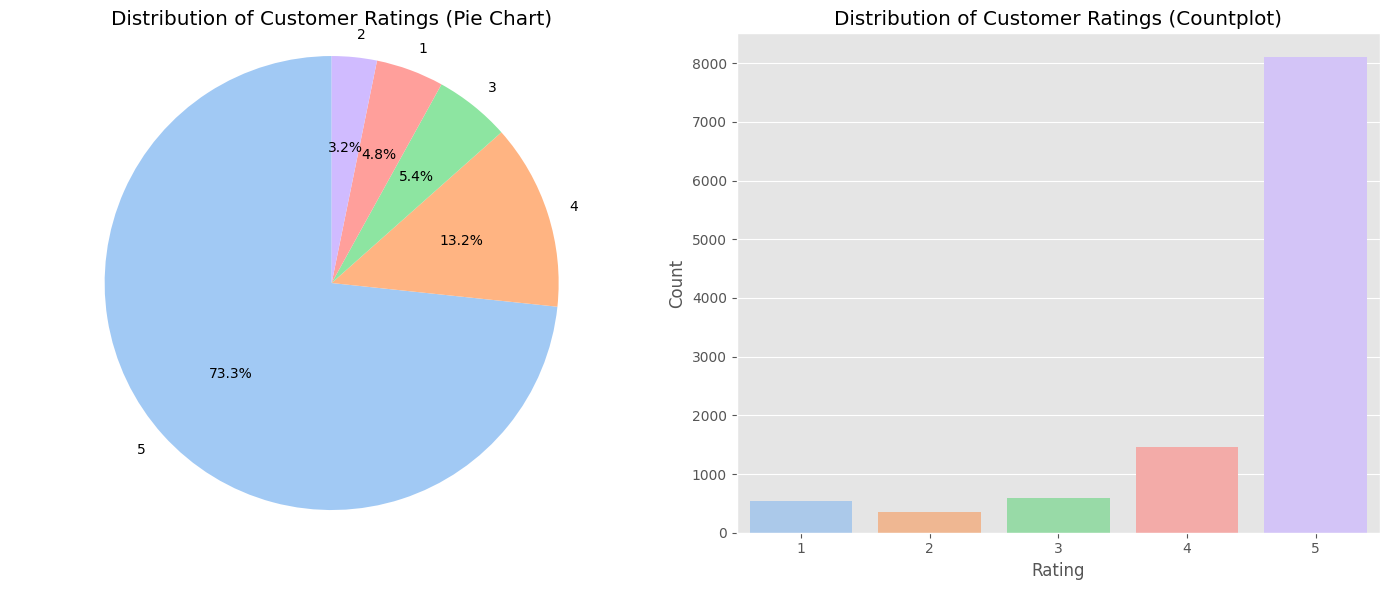

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

rating_counts = bakery_df['Rating'].value_counts()
axes[0].pie(rating_counts, labels=rating_counts.index, colors=sns.color_palette('pastel', len(rating_counts)), autopct='%1.1f%%', startangle=90, )
axes[0].set_title("Distribution of Customer Ratings (Pie Chart)")
axes[0].axis('equal')  

sns.countplot(data=bakery_df, x='Rating', palette='pastel', ax=axes[1])  
axes[1].set_title("Distribution of Customer Ratings (Countplot)")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Inference**

**Mean Rating:** The average rating of 4.47 indicates a strong inclination towards positive reviews. The standard deviation of 1.06 indicates a moderate variation in ratings, suggesting that while most products receive high ratings, there are still some products with low ratings (near the minimum of 1).

**Pie Chart:** About 73.3%, received 5-star ratings, signifying high levels of satisfaction.Lower ratings, particularly 1-star and 2-star reviews, were minimal, reflecting a smaller proportion of dissatisfied customers.

**Count Plot:** The count plot shows the stark contrast between the number of 5-star ratings and those rated lower. The prevalence of positive reviews suggests a strong product market fit and generally favorable customer experience.

## VADER model
**The first model implemented is VADER ( Valence Aware Dictionary and sEntiment Reasoner).**

I'm using NLTK's SentimentIntensityAnalyzer (by creating an object sia) to get the following sentiment scores of text in the summary col:
- negative
- neutral
- positive 
- compound

In [15]:
# Making a VADER sentiment score function
def apply_vader_sentiment(df, text_column='Summary'):
    # Sentiment Analysis object
    sia = SentimentIntensityAnalyzer()

    # Run sentiment analysis to get sentiment scores for each row
    sentiment_df = df.copy()
    sentiment_df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = sentiment_df[text_column].apply(
        lambda x: pd.Series(sia.polarity_scores(str(x)))
    )

    return sentiment_df

In [16]:
# Applying the function on Summary col
sentiment_df = apply_vader_sentiment(bakery_df, text_column='Summary')
print(sentiment_df.head(3))


      Id   ProductId          UserId    ProfileName  HelpfulnessNumerator  \
116  117  B0026Y3YBK  A3P60QLFDDCHOY  Giordano "GB"                     2   
117  118  B0026Y3YBK  A38BUM0OXH38VK   singlewinder                     0   
183  184  B001KUUNP6  A262Z0S6PT9U16   Lee Thombley                     3   

     HelpfulnessDenominator  Rating        Time  \
116                       2       5  1304899200   
117                       0       5  1347667200   
183                       3       5  1292716800   

                                            Summary  \
116                                   Great cookies   
117                           Best everyday cookie!   
183  Perfect for gluten-free chocolate chip cookies   

                                                  Text  vader_neg  vader_neu  \
116  I'm Italian and I lived in Italy for years. I ...        0.0      0.196   
117  In the 1980s I spent several summers in Italy....        0.0      0.308   
183  We made chocolate ch

### Plot of compound score for the Vader Model
The plot of compund rating shows the  relationship between `Rating` and the `vader_compound` sentiment score columns for the sentiment analysis.

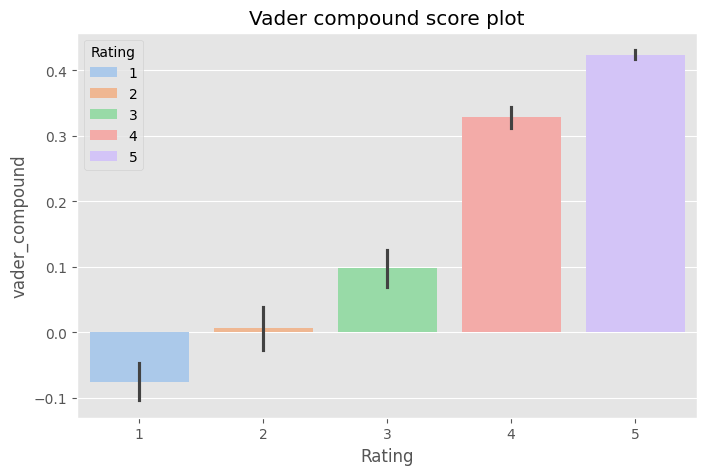

In [17]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data=sentiment_df, x='Rating', y='vader_compound', hue='Rating', palette = 'pastel')
ax.set_title('Vader compound score plot')
plt.show()

**Inference:**
- **Positive Sentiment**: Higher ratings (4 and 5 star ratings) have higher `vader_compound` scores -> customer feedback has more positive sentiment.
- **Negative Sentiment**: Lower ratings (1, 2 and 3 stars)  have lower `vader_compound` scores -> customer feedback has neutral or more negative sentiment.
- **Trend**: The scores gradually increase with ratings -> higher ratings correlate with more positive sentiment.
- **Error Bars**: The black vertical lines on top of each bar represent the confidence intervals or standard errors -> variability in estimation.

### Plot of Sentiment Analysis of Ratings for VADER Sentiment Scores

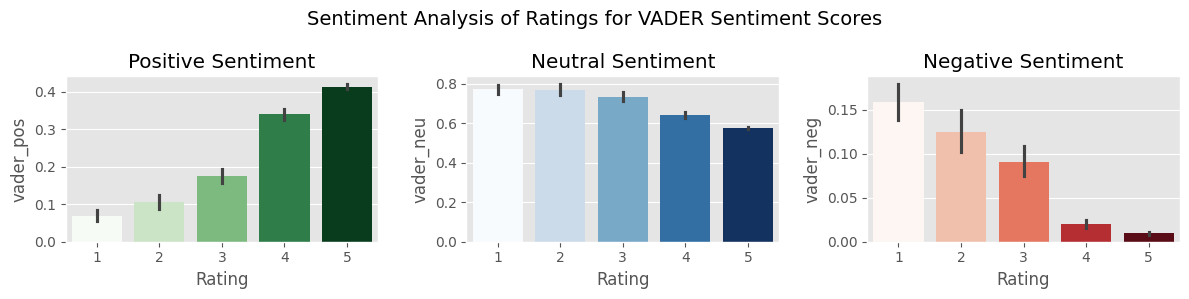

In [18]:
positive = 'Greens'  # For positive sentiment
neutral = 'Blues'  # For neutral sentiment
negative = 'Reds'   # For negative sentiment

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Making bar plots for each sentiment
sns.barplot(data=sentiment_df, x='Rating', y='vader_pos', ax=axs[0], hue='Rating', palette=positive, legend=False)
sns.barplot(data=sentiment_df, x='Rating', y='vader_neu', ax=axs[1], hue='Rating', palette=neutral, legend=False)
sns.barplot(data=sentiment_df, x='Rating', y='vader_neg', ax=axs[2], hue='Rating', palette=negative, legend=False)

# Titles
axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')
fig.suptitle('Sentiment Analysis of Ratings for VADER Sentiment Scores', fontsize=14)

plt.tight_layout()
plt.show()


**Inference:**
- **Positive Sentiment:** Higher ratings (4 and 5) show higher positive sentiment scores indicating customer satisfaction. Darker shades of green indicate more positive sentiment and lighter shades of green indicate lesser postive sentiment.  As customer ratings increase, the average positive sentiment score also increases. This indicates that higher-rated reviews tend to have stronger positive sentiment. The gradual shift from light green to dark green further emphasizes this trend. The error bars are relatively small, suggesting that the average sentiment scores are consistent within each rating group. 
- **Neutral Sentiment:** Mid-range ratings (3) are neither very positive nor very negative. So they indicate highest neutral sentiment. Darker shades of blue indicate more neutral sentiment and lighter shades of blue indicate lesser neutral sentiment.
- **Negative Sentiment:** Lower ratings (1 and 2) show higher negative sentiment scores, indicating customer dissatisfaction. Darker shades of red indicate more negative sentiment and lighter shades of red indicate lesser negative sentiment.As customer ratings increase, the average negative sentiment score slightly decreases. This indicates that higher-rated reviews tend to have slightly less negative sentiment. The shift from light pink to dark red is subtle. The error bars are again relatively small.

### Word Cloud for Vader Model

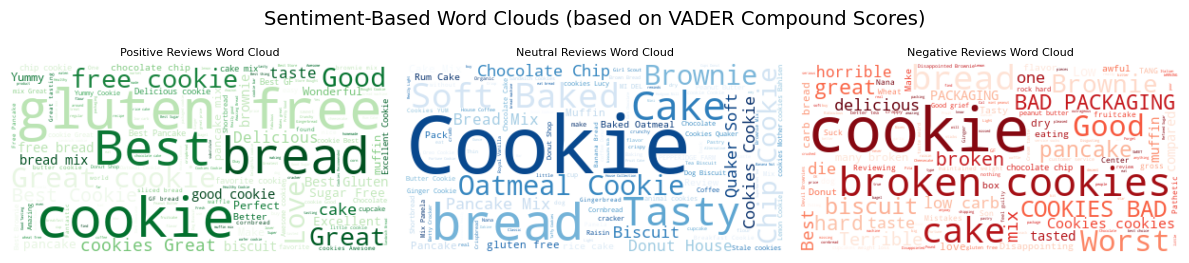

In [19]:
# Based on compund score threshold, categorizing sentiment of the summary col 
pos = sentiment_df[sentiment_df['vader_compound'] > 0.05]['Summary']
neg = sentiment_df[sentiment_df['vader_compound'] < -0.05]['Summary']
neu= sentiment_df[(sentiment_df['vader_compound'] >= -0.05) & (sentiment_df['vader_compound'] <= 0.05)]['Summary']

# Making a single text string by combining summaries of same sentiment
pos_text = " ".join(pos)
neg_text = " ".join(neg)
neu_text = " ".join(neu)

stopwords = set(STOPWORDS) #for pre-defined list of irrelevant words for analysis like articles, prepositions etc. 

# Making the word clouds for each sentiment
positive_wordcloud = WordCloud(stopwords = stopwords, background_color='white', colormap='Greens').generate(pos_text)
neutral_wordcloud = WordCloud(stopwords = stopwords, background_color='white', colormap='Blues').generate(neu_text)
negative_wordcloud = WordCloud(stopwords = stopwords, background_color='white', colormap='Reds').generate(neg_text)

# Plot 
fig, ax = plt.subplots(1, 3, figsize = (12,12))


ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].set_title("Positive Reviews Word Cloud", fontsize=8)
ax[0].axis("off")

ax[1].imshow(neutral_wordcloud, interpolation='bilinear')
ax[1].set_title("Neutral Reviews Word Cloud", fontsize=8)
ax[1].axis("off")

ax[2].imshow(negative_wordcloud, interpolation='bilinear')
ax[2].set_title("Negative Reviews Word Cloud", fontsize=8)
ax[2].axis("off")


fig.subplots_adjust(wspace=0, hspace= 0.1)
fig.suptitle('Sentiment-Based Word Clouds (based on VADER Compound Scores)', fontsize=14, y=0.61)
fig.tight_layout()
plt.show()

**Inference:**

- **Positive Sentiment Word Cloud**: Prominent words in this cloud show positive reception towards taste and dietary preferences.
- **Neutral Sentiment Word Cloud**: Prominent words in this cloud show lack strong emotion showing neutral sentiment. This cloud mainly shows description of the variety of products.
- **Negative Sentiment Word Cloud**: Prominent words in this cloud show negative reception and dissatisfaction.

## roBERTa Model

The second model implemented is roBERTa (Robustly optimized BERT approach).

I’m using Hugging Face’s transformers library to load a pre-trained roBERTa model to get the following sentiment scores of text in the summary col:
- negative
- neutral
- positive
- compound (calculated manually)

In [20]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
# Making a RoBERTa sentiment score function
def apply_roBERTa_sentiment(text_col):
    text = tokenizer(text_col, return_tensors='pt')
    output = model(**text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    dictionary = {
        'roberta_neg': score[0],
        'roberta_neu': score[1],
        'roberta_pos': score[2]
    }
    return dictionary

In [22]:
# Applying the function on Summary col
tqdm.pandas()  # Enabling a progress bar
sentiment_df['roberta_sentiment_scores'] = sentiment_df['Summary'].progress_apply(apply_roBERTa_sentiment)

# Drop unnecessary cols and separate the RoBERTa sentiment scores into three other cols
sentiment_df = pd.concat([sentiment_df.drop(columns=['roberta_sentiment_scores']),
                          sentiment_df['roberta_sentiment_scores'].apply(pd.Series)], axis=1)
sentiment_df.columns


100%|████████████████████████████████████████████████████████████████████████████| 11048/11048 [07:42<00:00, 23.91it/s]


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Rating', 'Time', 'Summary', 'Text',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

In [23]:
# RoBERTa Compound Score 
sentiment_df['roberta_compound'] = (sentiment_df['roberta_pos'] - sentiment_df['roberta_neg']) / (sentiment_df['roberta_pos'] + sentiment_df['roberta_neg'] + sentiment_df['roberta_neu'])

# Display the first few rows
print(sentiment_df.head())

      Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
116  117  B0026Y3YBK  A3P60QLFDDCHOY   Giordano "GB"                     2   
117  118  B0026Y3YBK  A38BUM0OXH38VK    singlewinder                     0   
183  184  B001KUUNP6  A262Z0S6PT9U16    Lee Thombley                     3   
375  376  B0087HW5E2  A139RTDNMU3WY5    blanket lady                     2   
394  395  B001ELL6O8  A13T2G4T8LR8XA  First Time Mom                     2   

     HelpfulnessDenominator  Rating        Time  \
116                       2       5  1304899200   
117                       0       5  1347667200   
183                       3       5  1292716800   
375                       2       5  1339977600   
394                       2       5  1189296000   

                                            Summary  \
116                                   Great cookies   
117                           Best everyday cookie!   
183  Perfect for gluten-free chocolate chip cookies   
375 

### Plot of compound score for the roBERTa Model
The plot of compund rating shows the  relationship between `Rating` and the `roberta_compound` sentiment score columns for the sentiment analysis.

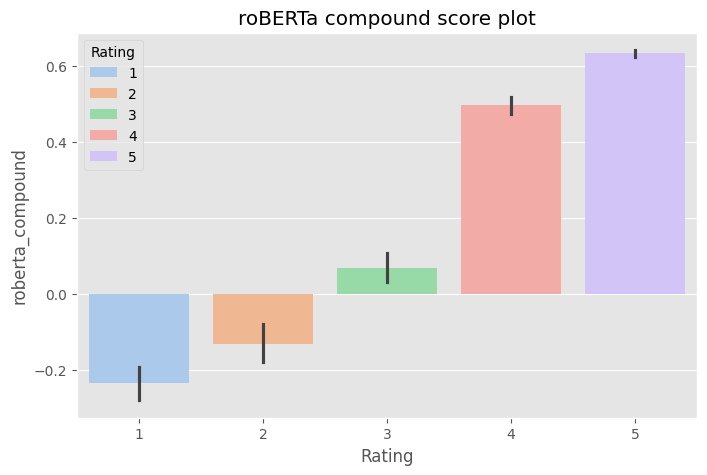

In [24]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data=sentiment_df, x='Rating', y='roberta_compound', hue='Rating', palette = 'pastel')
ax.set_title('roBERTa compound score plot')
plt.show()

**Inference:**
- **Positive Sentiment**: Higher ratings (4 and 5 star ratings) have higher `roberta_compound` scores -> customer feedback has more positive sentiment.
- **Negative Sentiment**: Lower ratings (1, 2 and 3 stars)  have lower `roberta_compound` scores -> customer feedback has neutral or more negative sentiment.
- **Trend**: The scores graudlly increase with ratings -> higher ratings correlate with more positive sentiment.
- **Error Bars**: The black vertical lines on top of each bar represent the confidence intervals or standard errors -> variability in estimation.

### Plot of Sentiment Analysis of Ratings for roBERTa Sentiment Scores

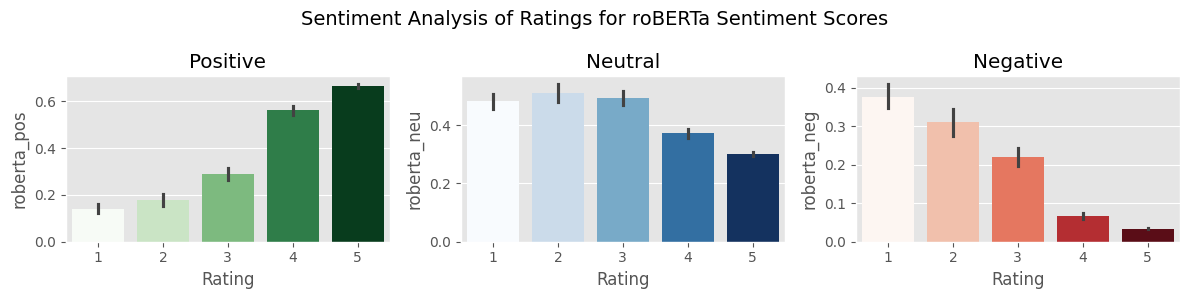

In [25]:
positive = 'Greens'  # For positive sentiment
neutral = 'Blues'  # For neutral sentiment
negative = 'Reds'   # For negative sentiment

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Making bar plots for each sentiment
sns.barplot(data=sentiment_df, x='Rating', y='roberta_pos', ax=axs[0], hue='Rating', palette=positive, legend=False)
sns.barplot(data=sentiment_df, x='Rating', y='roberta_neu', ax=axs[1], hue='Rating', palette=neutral, legend=False)
sns.barplot(data=sentiment_df, x='Rating', y='roberta_neg', ax=axs[2], hue='Rating', palette=negative, legend=False)

# Set titles for each subplot
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
fig.suptitle('Sentiment Analysis of Ratings for roBERTa Sentiment Scores', fontsize=14)

plt.tight_layout()
plt.show()

**Inference:**
- **Positive Sentiment:** Higher ratings (4 and 5) show higher positive sentiment scores indicating customer satisfaction. Darker shades of green indicate more positive sentiment and lighter shades of green indicate lesser postive sentiment. As customer ratings increase, the average positive sentiment score also increases. This indicates that higher-rated reviews tend to have stronger positive sentiment. The gradual shift from light green to dark green further emphasizes this trend. The error bars are relatively small, suggesting that the average sentiment scores are consistent within each rating group. 
- **Neutral Sentiment:** Mid-range ratings (3) are neither very positive nor very negative. So they indicate highest neutral sentiment. Darker shades of blue indicate more neutral sentiment and lighter shades of blue indicate lesser neutral sentiment.
- **Negative Sentiment:** Lower ratings (1 and 2) show higher negative sentiment scores, indicating customer dissatisfaction. Darker shades of red indicate more negative sentiment and lighter shades of red indicate lesser negative sentiment.As customer ratings increase, the average negative sentiment score slightly decreases. This indicates that higher-rated reviews tend to have slightly less negative sentiment. The shift from light pink to dark red is subtle. The error bars are again relatively small.

### Word Cloud for roBERTa Model

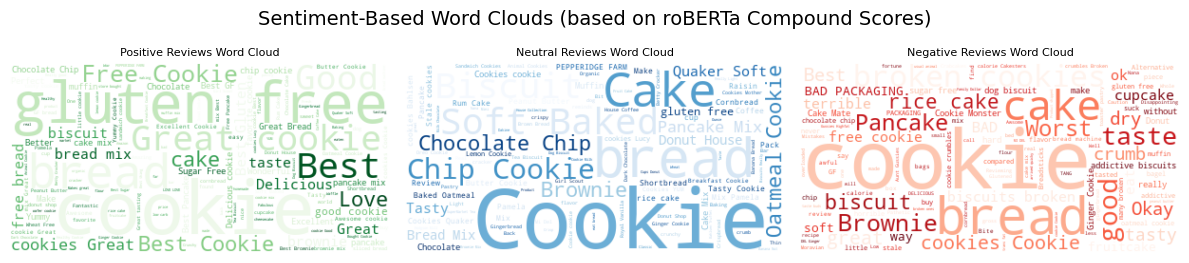

In [26]:
# Based on compund score threshold, categorizing sentiment of the summary col 
pos = sentiment_df[sentiment_df['roberta_compound'] > 0.05]['Summary']
neg = sentiment_df[sentiment_df['roberta_compound'] < -0.05]['Summary']
neu= sentiment_df[(sentiment_df['roberta_compound'] >= -0.05) & (sentiment_df['vader_compound'] <= 0.05)]['Summary']

# Making a single text string by combining summaries of same sentiment
pos_text = " ".join(pos)
neg_text = " ".join(neg)
neu_text = " ".join(neu)

stopwords = set(STOPWORDS)

# Making the word clouds for each sentiment
positive_wordcloud = WordCloud(stopwords = stopwords, background_color='white', colormap='Greens').generate(pos_text)
neutral_wordcloud = WordCloud(stopwords = stopwords, background_color='white', colormap='Blues').generate(neu_text)
negative_wordcloud = WordCloud(stopwords = stopwords, background_color='white', colormap='Reds').generate(neg_text)


# Plot 
fig, ax = plt.subplots(1, 3, figsize = (12,12))


ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].set_title("Positive Reviews Word Cloud", fontsize=8)
ax[0].axis("off")

ax[1].imshow(neutral_wordcloud, interpolation='bilinear')
ax[1].set_title("Neutral Reviews Word Cloud", fontsize=8)
ax[1].axis("off")

ax[2].imshow(negative_wordcloud, interpolation='bilinear')
ax[2].set_title("Negative Reviews Word Cloud", fontsize=8)
ax[2].axis("off")


fig.subplots_adjust(wspace=0, hspace= 0.1)
fig.suptitle('Sentiment-Based Word Clouds (based on roBERTa Compound Scores)', fontsize=14, y=0.61)
fig.tight_layout()
plt.show()

**Inference:**

- **Positive Sentiment Word Cloud**: Prominent words in this cloud show positive reception towards taste and dietary preferences.
- **Neutral Sentiment Word Cloud**: Prominent words in this cloud show lack strong emotion showing neutral sentiment. This cloud mainly shows description of the variety of products.
- **Negative Sentiment Word Cloud**: Prominent words in this cloud show negative reception and dissatisfaction.

### Pair plot for comparison of VADER and roBERTa models

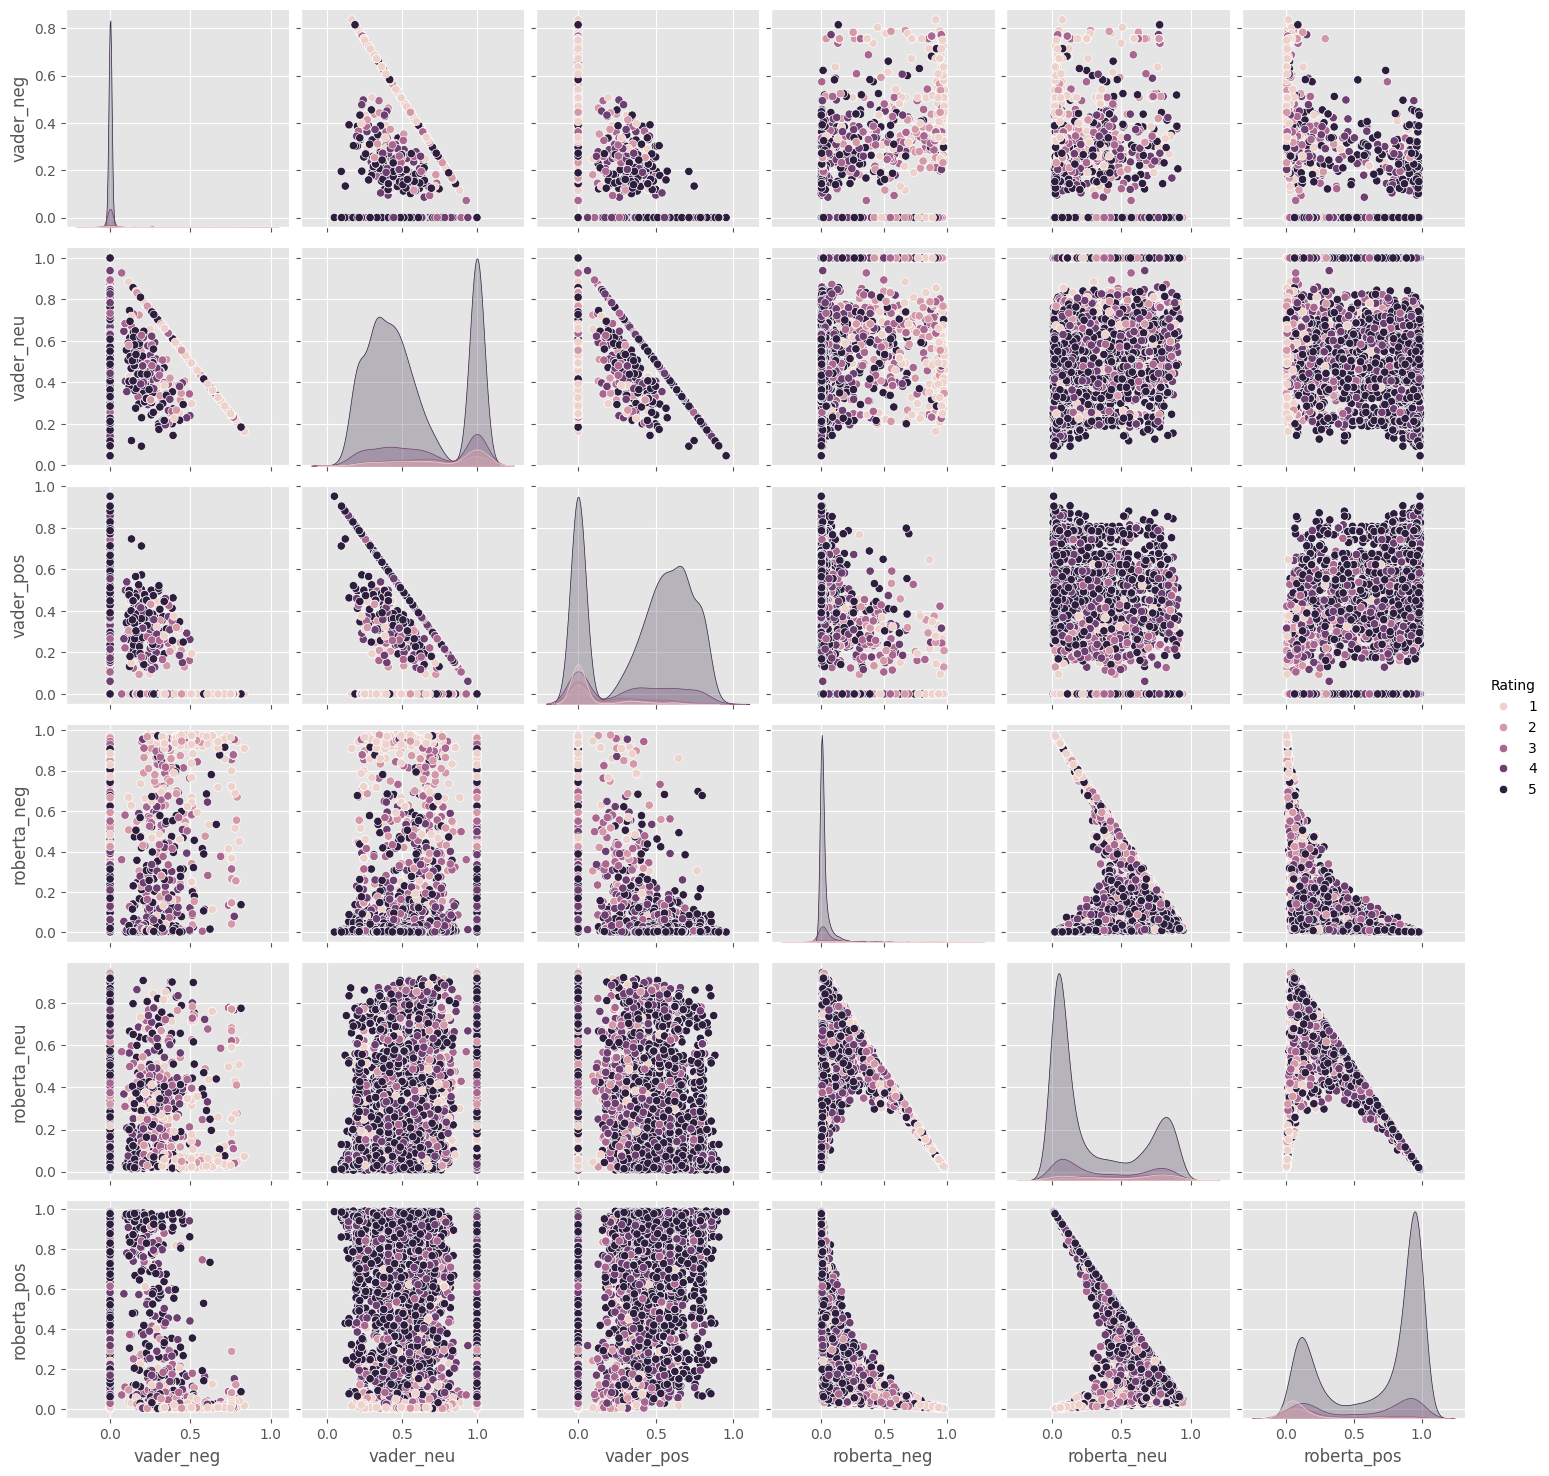

In [27]:
sns.pairplot(sentiment_df, hue='Rating', vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'])
plt.savefig('myimage.png', format='png', dpi= 300)
plt.show()

**Inference: VADER vs. RoBERTa**
- RoBERTa's positive and negative scores are more distinctly separated between different rating groups in contrast to VADER.
- So, RoBERTa is slightly better at judging rating based sentiment.
- Irrespective of rating, Vader scores large number of reviews as neutral. 
- Roberta detects negative sentiment stronger than vader.

### Hugging Face Pipeline (Transformers) Model
The third model implemented is the Hugging Face Pipeline using pre-trained transformer models (such as RoBERTa or BERT) for sentiment analysis.

I'm using  Hugging Face `pipeline` for sentiment analysis to get the following based on the text in the summary col:
- sentiment label (POSITIVE/NEGATIVE)
- sentiment score

In [28]:
# Making a Huggingface pipeline (Transformers) sentiment score function
def apply_transformers_sentiment(df, text_column):
    # Sentiment Analysis object
    sent_pipeline = pipeline("sentiment-analysis")
    
    # Run sentiment analysis to get sentiment scores for each row (with a progress bar enabled)
    df['sentiment'] = [sent_pipeline(x)[0]['label'] for x in tqdm(df[text_column], desc="Sentiment Analysis", unit="row")]
    df['sentiment_score'] = [sent_pipeline(x)[0]['score'] for x in tqdm(df[text_column], desc="Sentiment Score", unit="row")]
    
    return df

In [29]:
# Applying the function on Summary col
sentiment_df = apply_transformers_sentiment(sentiment_df, 'Summary')
print(sentiment_df.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Sentiment Score: 100%|██████████████████████████████████████████████████████████| 11048/11048 [03:47<00:00, 48.59row/s]

      Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
116  117  B0026Y3YBK  A3P60QLFDDCHOY   Giordano "GB"                     2   
117  118  B0026Y3YBK  A38BUM0OXH38VK    singlewinder                     0   
183  184  B001KUUNP6  A262Z0S6PT9U16    Lee Thombley                     3   
375  376  B0087HW5E2  A139RTDNMU3WY5    blanket lady                     2   
394  395  B001ELL6O8  A13T2G4T8LR8XA  First Time Mom                     2   

     HelpfulnessDenominator  Rating        Time  \
116                       2       5  1304899200   
117                       0       5  1347667200   
183                       3       5  1292716800   
375                       2       5  1339977600   
394                       2       5  1189296000   

                                            Summary  \
116                                   Great cookies   
117                           Best everyday cookie!   
183  Perfect for gluten-free chocolate chip cookies   
375 

### Plot of sentiment distribution across ratings for the Huggingface Pipeline (Transformers) Model

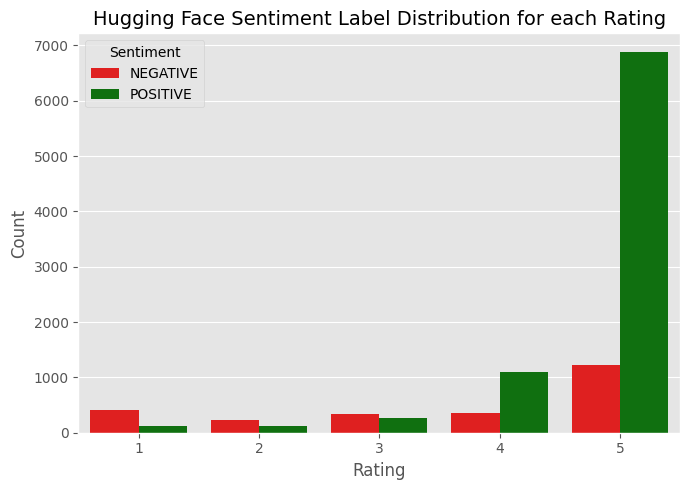

In [30]:
plt.figure(figsize=(7, 5))

# Making count plots for each sentiment 
sns.countplot(data=sentiment_df, x='Rating', hue='sentiment', palette={'POSITIVE': 'green', 'NEGATIVE': 'red'})

# Set titles
plt.title('Hugging Face Sentiment Label Distribution for each Rating', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()


**Inference:**

With an increase in ratings, there is a an increase in the proportion of positive sentiment. This shows that the model effectively captures  a strong positive reception from the customers as seen from the massive amount of 5 stars ratings.

### Plot of Sentiment Analysis of Ratings for Huggingface Pipeline (Transformers) Sentiment

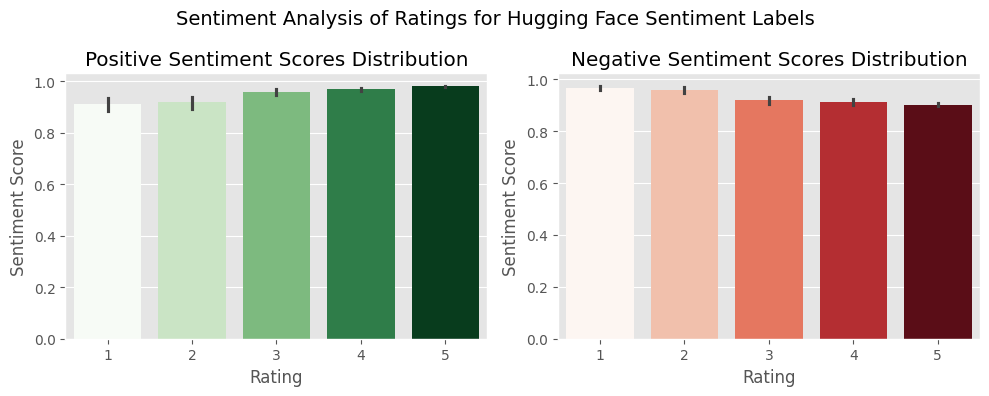

In [31]:
positive = 'Greens'  # For positive sentiment
negative = 'Reds'   # For negative sentiment


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Making bar plots for each sentiment
sns.barplot(data=sentiment_df[sentiment_df['sentiment'] == 'POSITIVE'], x='Rating', y='sentiment_score', ax=axs[0], hue='Rating', palette=positive, legend=False)
sns.barplot(data=sentiment_df[sentiment_df['sentiment'] == 'NEGATIVE'], x='Rating', y='sentiment_score', ax=axs[1], hue='Rating', palette=negative, legend=False)


# Set titles for each subplot
axs[0].set_title('Positive Sentiment Scores Distribution')
axs[0].set_ylabel('Sentiment Score')
axs[1].set_title('Negative Sentiment Scores Distribution')
axs[1].set_ylabel('Sentiment Score')

fig.suptitle('Sentiment Analysis of Ratings for Hugging Face Sentiment Labels', fontsize=14)

plt.tight_layout()
plt.show()

**Inference:**
- **Positive Sentiment:** Higher ratings (4 and 5) show higher positive sentiment scores indicating customer satisfaction. Darker shades of green indicate more positive sentiment and lighter shades of green indicate lesser postive sentiment. As customer ratings increase, the average positive sentiment score also increases. This indicates that higher-rated reviews tend to have stronger positive sentiment. The gradual shift from light green to dark green further emphasizes this trend. The error bars are relatively small, suggesting that the average sentiment scores are consistent within each rating group. 
- **Negative Sentiment:** Lower ratings (1 and 2) show higher negative sentiment scores, indicating customer dissatisfaction. Darker shades of red indicate more negative sentiment and lighter shades of red indicate lesser negative sentiment. As customer ratings increase, the average negative sentiment score slightly decreases. This indicates that higher-rated reviews tend to have slightly less negative sentiment. The shift from light pink to dark red is subtle. The error bars are again relatively small.

In [32]:
# Checking number of positive and negative summaries based on 'sentiment' column
positive_sentiments = sentiment_df[sentiment_df['sentiment'] == 'POSITIVE']
negative_sentiments = sentiment_df[sentiment_df['sentiment'] == 'NEGATIVE']

print(f"Positive Sentiments Count: {len(positive_sentiments)}")
print(f"Negative Sentiments Count: {len(negative_sentiments)}")

# Check sentiment score distribution for the 'sentiment' column
sentiment_df['sentiment_score'].describe()


Positive Sentiments Count: 8467
Negative Sentiments Count: 2581


count    11048.000000
mean         0.964097
std          0.089119
min          0.500198
25%          0.984166
50%          0.998952
75%          0.999817
max          0.999892
Name: sentiment_score, dtype: float64

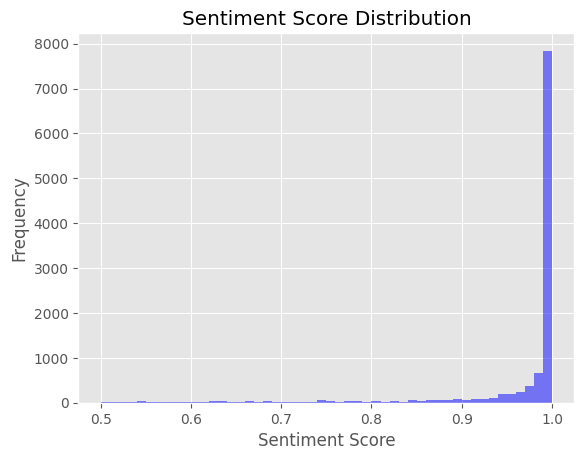

In [33]:
plt.hist(sentiment_df['sentiment_score'], bins=50, color='blue', alpha=0.5)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


### Word Cloud for Hugging Face Pipeline Model

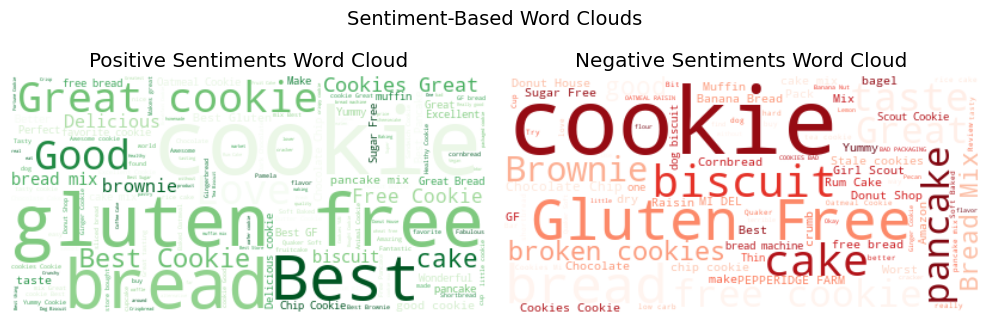

In [34]:
# Grouping the data by sentiment label
pos_reviews = sentiment_df[sentiment_df['sentiment'] == 'POSITIVE']['Summary']
neg_reviews = sentiment_df[sentiment_df['sentiment'] == 'NEGATIVE']['Summary']

# Join summaries for each sentiment
pos_text = " ".join(pos_reviews)
neg_text = " ".join(neg_reviews)

# Creating the word clouds
stopwords = set(STOPWORDS)
positive_wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='Greens').generate(pos_text)
negative_wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='Reds').generate(neg_text)

# Plot 
fig, ax = plt.subplots(1, 2, figsize = (10,8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Sentiments Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Sentiments Word Cloud")
plt.axis("off")

fig.suptitle('Sentiment-Based Word Clouds', fontsize=14, y=0.71)


plt.tight_layout()
plt.show()


**Inference:**

- **Positive Sentiment Word Cloud**: Prominent words in this cloud show positive reception towards taste and dietary preferences.
- **Negative Sentiment Word Cloud**: Prominent words in this cloud show negative reception and dissatisfaction.

## Manually assigning Actual Sentiment Scores

To evaluate the model I will manually assign sentiment scores (true sentiment) to the ratings given and based on that later evaluate if the models have predicted the sentiment correctly. If rating is more than 3 then it is a positive sentiment (1) else negative (0). In simpler words, we check to see if the model can classify a particular rating as positive/neutral/negative as appropirately as a human. 

In [35]:
# if ratings above 3 are positive sentiment and 3 or below are negative sentiment
sentiment_df['TS'] = sentiment_df['Rating'].apply(lambda x: 1 if x > 3 else 0)
print(sentiment_df.head(3))

      Id   ProductId          UserId    ProfileName  HelpfulnessNumerator  \
116  117  B0026Y3YBK  A3P60QLFDDCHOY  Giordano "GB"                     2   
117  118  B0026Y3YBK  A38BUM0OXH38VK   singlewinder                     0   
183  184  B001KUUNP6  A262Z0S6PT9U16   Lee Thombley                     3   

     HelpfulnessDenominator  Rating        Time  \
116                       2       5  1304899200   
117                       0       5  1347667200   
183                       3       5  1292716800   

                                            Summary  \
116                                   Great cookies   
117                           Best everyday cookie!   
183  Perfect for gluten-free chocolate chip cookies   

                                                  Text  ...  vader_neu  \
116  I'm Italian and I lived in Italy for years. I ...  ...      0.196   
117  In the 1980s I spent several summers in Italy....  ...      0.308   
183  We made chocolate chip cookies with BR

## Performance Evaluation

Now I will create the following columns:
- `VADER_Prediction` - 1 for positive where vader_compound > 0, 0 for negative where vader_compound <= 0
- `RoBERTa_Prediction` - 1 for positive where roberta_compound > 0, 0 for negative where roberta_compound <= 0
- `HuggingFace_Prediction` - : 1 for positive where sentiment_score > 0.5, 0 for negative where sentiment_score <= 0.5


Reason: These predictions are necessary for evaluation metrics like accuracy, precision, recall, and F1 score to gauge the model performance. The continuous or probabilistic outputs (vader_compound, roberta_compound, sentiment_score) are converted into binary predictions so that they can be compared with the true sentiment of ratings (assigned earlier).

In [36]:
# VADER Prediction
sentiment_df['VADER_Prediction'] = sentiment_df['vader_compound'].apply(lambda x: 1 if x > 0 else 0)

# RoBERTa Prediction
sentiment_df['RoBERTa_Prediction'] = sentiment_df['roberta_compound'].apply(lambda x: 1 if x > 0 else 0)

# HuggingFace Prediction
sentiment_df['HuggingFace_Prediction'] = sentiment_df['sentiment_score'].apply(lambda x: 1 if x > 0.5 else 0)

In [37]:
print(sentiment_df.head())

      Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
116  117  B0026Y3YBK  A3P60QLFDDCHOY   Giordano "GB"                     2   
117  118  B0026Y3YBK  A38BUM0OXH38VK    singlewinder                     0   
183  184  B001KUUNP6  A262Z0S6PT9U16    Lee Thombley                     3   
375  376  B0087HW5E2  A139RTDNMU3WY5    blanket lady                     2   
394  395  B001ELL6O8  A13T2G4T8LR8XA  First Time Mom                     2   

     HelpfulnessDenominator  Rating        Time  \
116                       2       5  1304899200   
117                       0       5  1347667200   
183                       3       5  1292716800   
375                       2       5  1339977600   
394                       2       5  1189296000   

                                            Summary  \
116                                   Great cookies   
117                           Best everyday cookie!   
183  Perfect for gluten-free chocolate chip cookies   
375 

### Calculating Accuracy, Precision, Recall, F1 score for all three models

In [38]:
# Metrics for VADER
vader_accuracy = accuracy_score(sentiment_df['TS'], sentiment_df['VADER_Prediction'])
vader_precision = precision_score(sentiment_df['TS'], sentiment_df['VADER_Prediction'])
vader_recall = recall_score(sentiment_df['TS'], sentiment_df['VADER_Prediction'])
vader_f1 = f1_score(sentiment_df['TS'], sentiment_df['VADER_Prediction'])

# Print the results for all three models
print("VADER Metrics: Accuracy, Precision, Recall, F1")
print(vader_accuracy, vader_precision, vader_recall, vader_f1)

VADER Metrics: Accuracy, Precision, Recall, F1
0.6908942795076032 0.9415397874174087 0.685454355327826 0.7933434190620272


In [39]:
# Metrics for RoBERTa
roberta_accuracy = accuracy_score(sentiment_df['TS'], sentiment_df['RoBERTa_Prediction'])
roberta_precision = precision_score(sentiment_df['TS'], sentiment_df['RoBERTa_Prediction'])
roberta_recall = recall_score(sentiment_df['TS'], sentiment_df['RoBERTa_Prediction'])
roberta_f1 = f1_score(sentiment_df['TS'], sentiment_df['RoBERTa_Prediction'])

print("RoBERTa Metrics: Accuracy, Precision, Recall, F1")
print(roberta_accuracy, roberta_precision, roberta_recall, roberta_f1)

RoBERTa Metrics: Accuracy, Precision, Recall, F1
0.8715604634322954 0.9245204336947456 0.9273240614869811 0.925920125293657


In [40]:
# Metrics for Hugging Face Pipeline (Transformers)
hfp_accuracy = accuracy_score(sentiment_df['TS'], sentiment_df['HuggingFace_Prediction'])
hfp_precision = precision_score(sentiment_df['TS'], sentiment_df['HuggingFace_Prediction'])
hfp_recall = recall_score(sentiment_df['TS'], sentiment_df['HuggingFace_Prediction'])
hfp_f1 = f1_score(sentiment_df['TS'], sentiment_df['HuggingFace_Prediction'])

print("HuggingFace Pipeline Metrics: Accuracy, Precision, Recall, F1")
print(hfp_accuracy, hfp_precision, hfp_recall, hfp_f1)


HuggingFace Pipeline Metrics: Accuracy, Precision, Recall, F1
0.8655865314989138 0.8655865314989138 1.0 0.9279510940759789


### Collating the results

In [41]:
table = PrettyTable()

# Set column names
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

# Add rows for each model's metrics, format as percentages with 2 decimal places
table.add_row(["VADER", f"{vader_accuracy * 100:.2f}%", f"{vader_precision * 100:.2f}%", f"{vader_recall * 100:.2f}%", f"{vader_f1 * 100:.2f}%"])
table.add_row(["RoBERTa", f"{roberta_accuracy * 100:.2f}%", f"{roberta_precision * 100:.2f}%", f"{roberta_recall * 100:.2f}%", f"{roberta_f1 * 100:.2f}%"])
table.add_row(["HuggingFace Pipeline", f"{hfp_accuracy * 100:.2f}%", f"{hfp_precision * 100:.2f}%", f"{hfp_recall * 100:.2f}%", f"{hfp_f1 * 100:.2f}%"])

# Print the table
print(table)


+----------------------+----------+-----------+---------+----------+
|        Model         | Accuracy | Precision |  Recall | F1 Score |
+----------------------+----------+-----------+---------+----------+
|        VADER         |  69.09%  |   94.15%  |  68.55% |  79.33%  |
|       RoBERTa        |  87.16%  |   92.45%  |  92.73% |  92.59%  |
| HuggingFace Pipeline |  86.56%  |   86.56%  | 100.00% |  92.80%  |
+----------------------+----------+-----------+---------+----------+


**Inference:**

**RoBERTa Stands Out:**
RoBERTa demonstrates the highest overall performance, with an accuracy of 87.16% and an F1 score of 92.59%

It exhibits a strong balance between precision (92.45%) and recall (92.73%), indicating it is good at both identifying positive sentiments correctly and capturing most of the actual positive instances.

**HuggingFace Pipeline Strong Recall:**
The HuggingFace Pipeline also performs well, with an accuracy of 86.56% and an F1 score of 92.80%.
It achieves a perfect recall of 100.00%, meaning it successfully identified all actual positive sentiments in the dataset.
However it has the lowest precision of the three models, meaning that while it found all the positive results, it also labeled a lot of negative results as positive.

**VADER's Limitations:**
VADER shows the lowest performance among the three models.
While it has high precision (94.15%), its recall is significantly lower (68.55%), resulting in a lower F1 score (79.33%). This suggests that VADER is conservative in its positive sentiment predictions, missing many actual positive instances.
It also has the lowest accuracy of the three models.

### Confusion Matrix

In [42]:
# Confusion matrices for each model
vader_conf_matrix = confusion_matrix(sentiment_df['TS'], sentiment_df['VADER_Prediction'])
roberta_conf_matrix = confusion_matrix(sentiment_df['TS'], sentiment_df['RoBERTa_Prediction'])
hf_conf_matrix = confusion_matrix(sentiment_df['TS'], sentiment_df['HuggingFace_Prediction'])

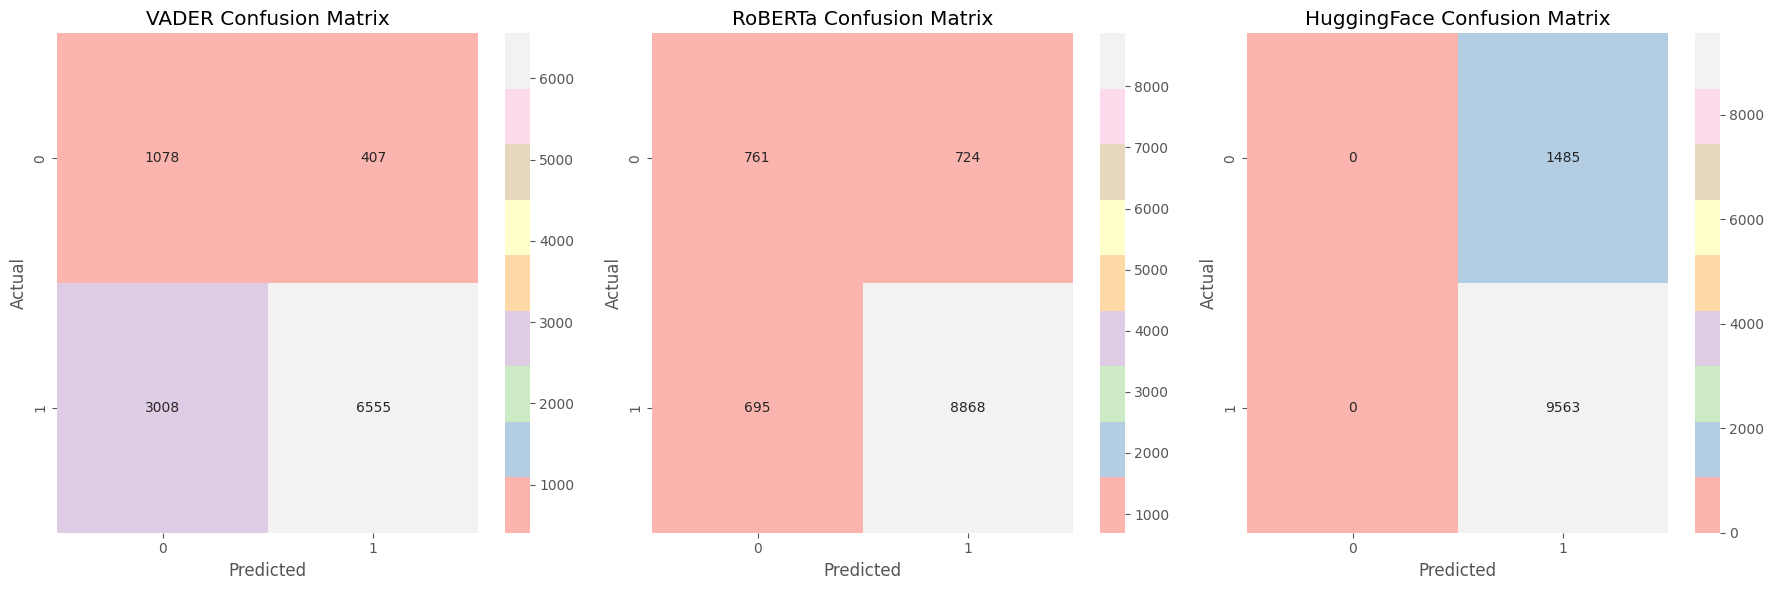

In [43]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of confusion matrices and corresponding titles
conf_matrices = [vader_conf_matrix, roberta_conf_matrix, hf_conf_matrix]
titles = ['VADER Confusion Matrix', 'RoBERTa Confusion Matrix', 'HuggingFace Confusion Matrix']

# Plot each confusion matrix using i as index
for i in range(3):
    sns.heatmap(conf_matrices[i], annot=True, fmt ='d', cmap='Pastel1', ax=axes[i])

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Adjust layout and display
plt.tight_layout()
plt.show()


**Inference**
- Transformer-based models (RoBERTa and HuggingFace Pipeline) **significantly outperform** the lexicon-based VADER model in sentiment analysis accuracy and F1 score.
- RoBERTa provides a well-balanced performance, while the HuggingFace Pipeline excels in recall, potentially at the cost of precision.
  
**For this data set, if it is more important to find every positive sentiment, even if some negative sentiments are incorrectly labeled, then the hugging face pipeline would be the best choice. If it is more important to have an overall balanced result, then Roberta is the better choice.**